<div style="font-size: 28px; color: #e91e63; font-weight: bold; background-color: #fff; padding: 10px; border-radius: 8px; border: 2px solid #e91e63; text-align: center;">
    Lab Exercise 8: Hidden Markov Model Implementation
</div>


<div style="font-size: 24px; color: #e91e63; font-weight: bold; background-color: #fff; padding: 8px; border-left: 5px solid #e91e63; margin-bottom: 10px;">
    Importing Necessary Libraries
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

<div style="font-size: 24px; color: #e91e63; font-weight: bold; margin-bottom: 10px;">
    Task (a): Representing the HMM parameters (initial probabilities, transition probabilities, and emission probabilities)
</div>

Specifically:

- Initial Probabilities will be represented as a dictionary.
- Transition Probabilities will be represented as a 2D matrix (NumPy array).
- Emission Probabilities will also be represented as a 2D matrix (NumPy array).

In [ ]:
phonemes = ['/s/', '/p/', '/ie:/', '/tf/']
phoneme_index = {phoneme: i for i, phoneme in enumerate(phonemes)}

initial_probabilities = {'/s/': 1.0, '/p/': 0.0, '/ie:/': 0.0, '/tf/': 0.0}

transition_probabilities = np.array([
    [0.1, 0.8, 0.1, 0.0],  
    [0.0, 0.1, 0.8, 0.1], 
    [0.0, 0.0, 0.2, 0.8], 
    [0.2, 0.0, 0.0, 0.8]   
])

emission_probabilities = np.array([
    [0.7, 0.2, 0.1], 
    [0.5, 0.3, 0.2],  
    [0.3, 0.5, 0.2], 
    [0.4, 0.4, 0.2] 
])

observations = ['Energy', 'Pitch', 'Duration']

<div style="font-size: 24px; color: #e91e63; font-weight: bold; margin-bottom: 10px;">
    Task (b): Displaying the HMM parameters neatly
</div>
I have written a function to display the transition matrix, emission matrix, and initial probabilities.


In [12]:
def display_hmm_parameters():
    print("Initial Probabilities:")
    for phoneme, prob in initial_probabilities.items():
        print(f"{phoneme}: {prob}")
        
display_hmm_parameters()

Initial Probabilities:
/s/: 1.0
/p/: 0.0
/ie:/: 0.0
/tf/: 0.0


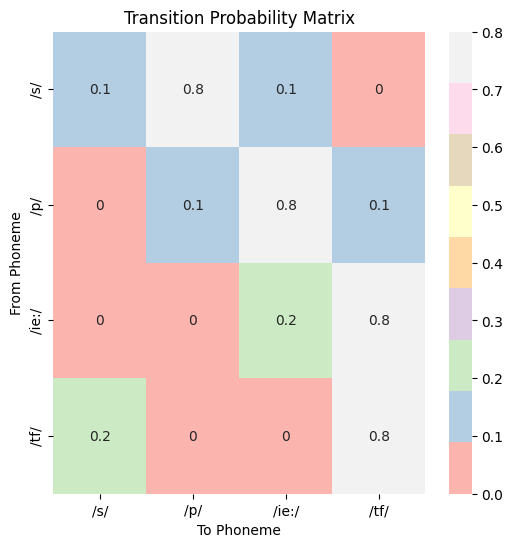

In [23]:
def plot_transition_matrix():
    plt.figure(figsize=(6, 6))
    sns.heatmap(transition_probabilities, annot=True, cmap="Pastel1", xticklabels=phonemes, yticklabels=phonemes)
    plt.title("Transition Probability Matrix")
    plt.xlabel("To Phoneme")
    plt.ylabel("From Phoneme")
    plt.show()

plot_transition_matrix()

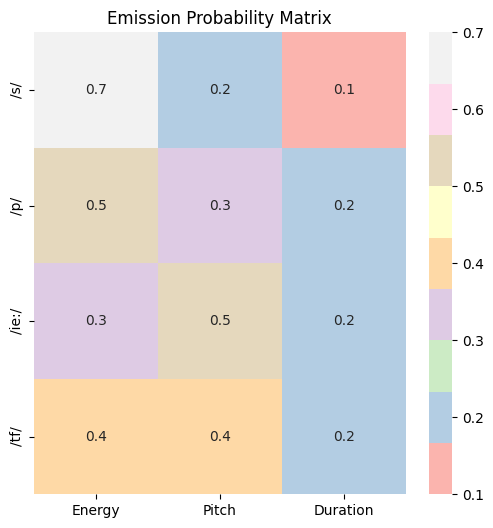

In [42]:
def plot_transition_matrix():
    plt.figure(figsize=(6, 6))
    sns.heatmap(emission_probabilities, annot=True, cmap="Pastel1", yticklabels=phonemes,xticklabels=["Energy","Pitch","Duration"])
    plt.title("Emission Probability Matrix")
    plt.show()

plot_transition_matrix()

<div style="font-size: 24px; color: #e91e63; font-weight: bold; margin-bottom: 10px;">
    Main Function: Speech to Text Conversion
</div>

This program simulates the generation of a phoneme sequence and corresponding observations.

In [ ]:
initial_probabilities = {
    '/s/': 1.0,
    '/p/': 0.0,
    '/ie:/': 0.0,
    '/tf/': 0.0
}

transition_probabilities = {
    '/s/': {'/s/': 0.1, '/p/': 0.8, '/ie:/': 0.1, '/tf/': 0.0},
    '/p/': {'/s/': 0.0, '/p/': 0.1, '/ie:/': 0.8, '/tf/': 0.1},
    '/ie:/': {'/s/': 0.0, '/p/': 0.0, '/ie:/': 0.2, '/tf/': 0.8},
    '/tf/': {'/s/': 0.2, '/p/': 0.0, '/ie:/': 0.0, '/tf/': 0.8},
}

emission_probabilities = {
    '/s/': {'Energy': 0.7, 'Pitch': 0.2, 'Duration': 0.1},
    '/p/': {'Energy': 0.5, 'Pitch': 0.3, 'Duration': 0.2},
    '/ie:/': {'Energy': 0.3, 'Pitch': 0.5, 'Duration': 0.2},
    '/tf/': {'Energy': 0.4, 'Pitch': 0.4, 'Duration': 0.2},
}

In [60]:
def generate_sequence_fixed_deterministic(num_steps=4):

    states = list(initial_probabilities.keys())
    observations = list(emission_probabilities['/s/'].keys())
    current_state = '/s/'  
    phoneme_sequence = [current_state]
    observation_sequence = []

    for _ in range(num_steps):  
        most_likely_observation = max(emission_probabilities[current_state], key=emission_probabilities[current_state].get)
        observation_sequence.append(most_likely_observation)

        next_state = random.choices(
            states,
            weights=[transition_probabilities[current_state][s] for s in states]
        )[0]
        phoneme_sequence.append(next_state)
        current_state = next_state

    return phoneme_sequence[:-1], observation_sequence


phoneme_sequence, observation_sequence = generate_sequence_fixed_deterministic()
print("\nCorrected Phoneme Sequence:", phoneme_sequence)
print("Corrected Observation Sequence:", observation_sequence)


Corrected Phoneme Sequence: ['/s/', '/p/', '/ie:/', '/tf/']
Corrected Observation Sequence: ['Energy', 'Energy', 'Pitch', 'Energy']


<div style="font-size: 24px; color: #e91e63; font-weight: bold; margin-bottom: 10px;">
   Inference
</div>



1. **Hidden Markov Models in Speech Processing**:
   - HMMs are widely used in speech recognition systems, where they model the relationship between **hidden states** (phonemes) and **observable features** (acoustic signals). In this case:
     - **Hidden states**: `/s/, /p/, /ie:/, /tf/`
     - **Observations**: Energy, Energy, Pitch, Energy
   - The model uses **transition probabilities** to move between phonemes and **emission probabilities** to predict acoustic properties.

2. **Generated Output**:
   - The generated phoneme sequence reflects the most probable path through the phonemes of "speech."
   - The observation sequence provides a plausible set of acoustic features for this phoneme sequence.


3. **Output Validation**:
   - The transitions align with high-probability paths in the transition matrix.
   - Observations are generated with respect to the emission probabilities, demonstrating the stochastic nature of the model.


---





<div style="font-size: 24px; color: #e91e63; font-weight: bold; margin-bottom: 10px;">
    References
</div>

1. Rabiner, L. R. (1989). "A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition." *Proceedings of the IEEE*. This seminal paper provides a detailed overview of HMMs and their applications in speech processing.
2. Jurafsky, D., & Martin, J. H. (2022). *Speech and Language Processing* (3rd Edition). A comprehensive resource on the application of HMMs in natural language and speech processing.
3. Jelinek, F. (1997). *Statistical Methods for Speech Recognition*. MIT Press. Discusses statistical modeling techniques, including HMMs, for speech recognition tasks.

---